# Spulen

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [5]:
U = np.array([-5.14,-4.63,-4.11,-3.601,-3.088,-2.573,-2.058,-1.545,-1.030,-0.514,0.4e-3,0.515,1.030,1.546,2.064,2.579,3.094,3.609,4.12,4.635,5.15])
I = np.array([-3.01,-2.70,-2.39,-2.09,-1.79,-1.49,-1.19,-0.89,-0.59,-0.30,0.0,0.30,0.60,0.89,1.20,1.50,1.79,2.09,2.39,2.68,2.98])

# Als Fehler wird noch Genauigkeit der Multimeter genommen...
# Fehler noch aus Datenblatt...
Uerr = np.array([0.005*u+0.03 for u in U[0:3]] + [0.005*u+0.003 for u in U[3:10]] + [0.005*U[10]+0.3e-3] + [0.005*u+0.003 for u in U[11:18]] + [0.005*u+0.03 for u in U[18:21]])
Ierr = np.array([abs(0.02*i)+0.05 for i in I])
print(Uerr)
print(Ierr)

def lin(x,m,b):
    return m*x+b

[ 0.0043    0.00685   0.00945  -0.015005 -0.01244  -0.009865 -0.00729
 -0.004725 -0.00215   0.00043   0.000302  0.005575  0.00815   0.01073
  0.01332   0.015895  0.01847   0.021045  0.0506    0.053175  0.05575 ]
[0.1102 0.104  0.0978 0.0918 0.0858 0.0798 0.0738 0.0678 0.0618 0.056
 0.05   0.056  0.062  0.0678 0.074  0.08   0.0858 0.0918 0.0978 0.1036
 0.1096]


Steigung:
0.5806117775757463
0.0005623827674162643
0.9999910872828145 1.3858548955873368e-46
Widerstand:  1.722321245661505
Fehler:  0.0016682468835875121


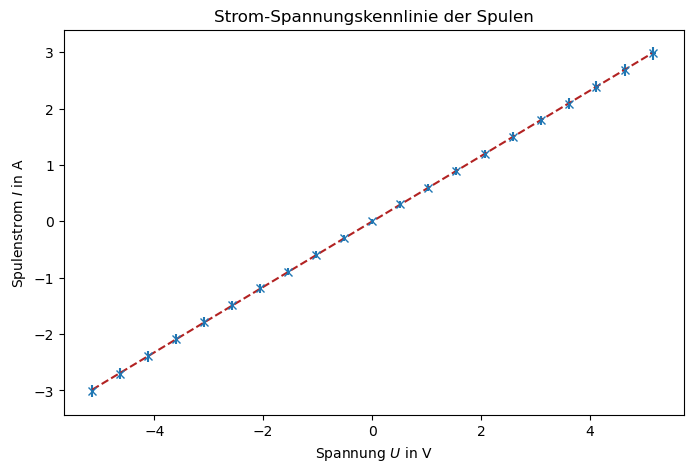

In [6]:
fig, ax = plt.subplots(figsize=(8,5))

slope, intercept, rvalue, pvalue, slope_std = linregress(U,I)

print('Steigung:')
print(slope)
print(slope_std)
print(rvalue,pvalue)

print('Widerstand: ',1/slope)
print('Fehler: ',slope_std/slope/slope)

ax.errorbar(U,I,yerr=Ierr,xerr=Uerr,linestyle='',marker='x')
ax.plot(U,lin(U,slope,intercept),linestyle='--',color='firebrick')
ax.set_xlabel('Spannung $U$ in V')
ax.set_ylabel('Spulenstrom $I$ in A')
plt.title('Strom-Spannungskennlinie der Spulen')
plt.savefig('figures/strom_spannungs_kennlinie_spulen.pdf')